In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import os

In [2]:
#read csv file & assign to a dataframe from https://www.kaggle.com/karthickveerakumar/spam-filter/version/1#emails.csv
df = pd.read_csv("emails.csv")

In [3]:
#show the first 5 elements of the csv
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
#print number of rows and columns
df.shape

(5728, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
#show element n
print(df.iloc[10][0])

Subject: las vegas high rise boom  las vegas is fast becoming a major metropolitan city ! 60 +  new high rise towers are expected to be built on and around the las vegas strip  within the next 3 - 4 years , that ' s 30 , 000 + condominiums !  this boom has just begun ! buy first . . . early phase ,  pre - construction pricing is now available on las vegas high rises including  trump , cosmopolitan , mgm , turnberry , icon , sky , among others .  join the interest list :  http : / / www . verticallv . com  message has been sent to you by realty one highrise . learn more at www . verticallv . comif you  wish to be excluded from future mailings , please reply with the word remove in  the subject line . 


In [7]:
df.isnull().sum() #shows how many rows are null, this is good practice if we want to take care of null value in data prep

text    0
spam    0
dtype: int64

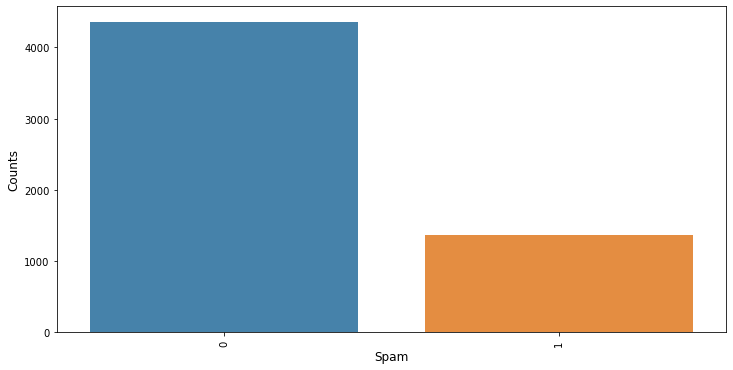

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
label_counts = df.spam.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)

plt.xticks(rotation = 'vertical')
plt.xlabel('Spam', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [9]:
#In Python3, string.punctuation is a pre-initialized string used as string constant, this contain all the punctuation
punct= string.punctuation

In [10]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
nltk.download('stopwords')
#this package from natural language toolkit contains all the stopword in the major languages

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words("english"))

In [13]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
#now we remove all punctuations and stop words
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [15]:
def remove_punct(text):
    nopunct = [char for char in text if char not in punct]
    nopunct = ''.join(nopunct)
    return(nopunct)

#this function remove the punctuation
    

In [16]:
df1 = df['text'].apply(remove_punct)

In [17]:
df1

0       Subject naturally irresistible your corporate ...
1       Subject the stock trading gunslinger  fanny is...
2       Subject unbelievable new homes made easy  im w...
3       Subject 4 color printing special  request addi...
4       Subject do not have money  get software cds fr...
                              ...                        
5723    Subject re  research and development charges t...
5724    Subject re  receipts from visit  jim   thanks ...
5725    Subject re  enron case study update  wow  all ...
5726    Subject re  interest  david   please  call shi...
5727    Subject news  aurora 5  2 update  aurora versi...
Name: text, Length: 5728, dtype: object

In [18]:
#now we remove all stop words
def remove_stop(text):
    nostop = [word for word in text.split() if word.lower() not in stop_words]
    return(nostop)

In [19]:
df2 = df1.apply(remove_stop)

In [20]:
df2 #at this point we have a list of tokens to analyze

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

In [21]:
def remove_everything(text):
    return remove_stop(remove_punct(text))

#this is definetely not the best coding - but is just to show the progression

In [22]:
df['text'].apply(remove_everything)

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [24]:
message = 'KEA is a university, /////located in Nørrebro I love burger burger'
message2 = "are great or burger, burger"
message3 = 'hey i love berries and burger love burger a lot burger'
print(message)

KEA is a university, /////located in Nørrebro I love burger burger


In [25]:
vectorizer = CountVectorizer(analyzer=remove_everything)
#initialize a vector object


In [26]:
vect_fit_trans = vectorizer.fit_transform([message,message2,message3]) 
#run the function fit_transform over the array of messages

In [67]:
count_tokens=vectorizer.get_feature_names()
#shows all the features extracted - they are simply put in alphabetical order

In [68]:
count_tokens

['KEA',
 'Nørrebro',
 'berries',
 'burger',
 'great',
 'hey',
 'located',
 'lot',
 'love',
 'university']

In [28]:
print(vect_fit_trans)
#each word is transformed into a vector (x,y) n
#bag of words

  (0, 0)	1
  (0, 9)	1
  (0, 6)	1
  (0, 1)	1
  (0, 8)	1
  (0, 3)	2
  (1, 3)	2
  (1, 4)	1
  (2, 8)	2
  (2, 3)	3
  (2, 5)	1
  (2, 2)	1
  (2, 7)	1


In [70]:
df_countvect = pd.DataFrame(data = vect_fit_trans.toarray(),index = ['message','message2','message3'],columns = count_tokens)

In [71]:
df_countvect

,KEA,Nørrebro,berries,burger,great,hey,located,lot,love,university
message,1,1,0,2,0,0,1,0,1,1
message2,0,0,0,2,1,0,0,0,0,0
message3,0,0,1,3,0,1,0,1,2,0


In [29]:
transformvc = CountVectorizer(analyzer=remove_everything)

In [30]:
FiTrannsformvc = transformvc.fit_transform(df['text'])

In [31]:
transformvc.get_feature_names()


['\x01',
 '\x02',
 '\x03',
 '\x05',
 '\x06',
 '\x07',
 '\x08',
 '\x0f',
 '\x10',
 '\x12',
 '\x14',
 '\x15',
 '\x19',
 '0',
 '00',
 '000',
 '0000',
 '000000',
 '00000000',
 '0000000000',
 '000000000003619',
 '000000000003991',
 '000000000003997',
 '000000000005168',
 '000000000005409',
 '000000000005411',
 '000000000005412',
 '000000000005413',
 '000000000005820',
 '000000000006238',
 '000000000006452',
 '000000000007494',
 '000000000007498',
 '000000000007876',
 '000000000010552',
 '000000000011185',
 '000000000012677',
 '000000000012734',
 '000000000012735',
 '000000000012736',
 '000000000012738',
 '000000000012741',
 '000000000012987',
 '000000000013085',
 '000000000013287',
 '000000000015384',
 '000000000015793',
 '000000000023619',
 '000000000024099',
 '000000000025307',
 '000000000025312',
 '000010220',
 '0000102317',
 '0000102374',
 '0000102789',
 '0000104281',
 '0000104282',
 '0000104486',
 '0000104631',
 '0000104730',
 '0000104776',
 '0000104778',
 '0000107043',
 '0000108729',


In [ ]:
count_tokens = vectorizer.get_feature_names()

In [32]:
messages_mat = CountVectorizer(analyzer=remove_everything).fit_transform(df['text'])

In [33]:
#now we split the dataset 80% for training and 20% for test
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(messages_mat, df['spam'], test_size=0.20, random_state=75)

# Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# I used Naive Bayes, being one of the most popular algoryth for spam detection
# https://www.quora.com/What-are-the-popular-ML-algorithms-for-email-spam-detection

MultinomialNB()

In [36]:
X_train.shape #verify that train & test have the same shape, we fit_transform before the split, therefore it shouldn't be a problem

(4582, 37229)

In [37]:
X_test.shape

(1146, 37229)

In [38]:
print(classifier.predict(X_train))
print(y_train.values)

[1 0 0 ... 0 1 0]
[1 0 0 ... 0 1 0]


In [39]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3484
           1       0.99      1.00      0.99      1098

    accuracy                           1.00      4582
   macro avg       0.99      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582

Confusion Matrix: 
 [[3471   13]
 [   2 1096]]

Accuracy:  0.9967263203841118


In [40]:
import seaborn as sn
import matplotlib.pyplot as plt

In [41]:
#Print the predictions
print('Predicted value: ',classifier.predict(X_test))

#Print Actual Label
print('Actual value: ',y_test.values)

Predicted value:  [0 0 0 ... 0 0 0]
Actual value:  [0 0 0 ... 0 0 0]


In [42]:
#evaluate the model on the test data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       876
           1       0.97      1.00      0.99       270

    accuracy                           0.99      1146
   macro avg       0.99      1.00      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [43]:
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

Confusion Matrix: 
 [[868   8]
 [  0 270]]

Accuracy:  0.9930191972076788


In [44]:
realmsg = '''
cacciatore ' s sounds fine with us . we will see you there at 7 : 00  p . m .  enron alp team  - - - - - original message - - - - -  from : kenneth . parkhill @ enron . com [ mailto : kenneth . parkhill @ enron . com ]  sent : tuesday , january 23 , 2001 10 : 47 am  to : luigical @ rice . edu ; ghosei @ rice . edu ; ghoshr @ rice . edu ; iqbal @ rice . edu ;  pravas @ rice . edu ; cwomack @ rice . edu ; barrett @ rice . edu ; uecker @ rice . edu ;  loughrid @ rice . edu  cc : vince . j . kaminski @ enron . com  subject : hello team  we are very excited to be able to welcome your alp team to enron . we are  looking to working with you this semester . to kick things off , we would  like to invite you to cacciatore ' s this thursday for dinner ( 1 / 25 / 01 , 7 pm ) .  if you can ' t stand italian cuisine , or would like to try a different day or  time , please feel free to make a suggestion . we look forward to meeting  you .  ken  713 / 345 - 4638'''
print(realmsg)


cacciatore ' s sounds fine with us . we will see you there at 7 : 00  p . m .  enron alp team  - - - - - original message - - - - -  from : kenneth . parkhill @ enron . com [ mailto : kenneth . parkhill @ enron . com ]  sent : tuesday , january 23 , 2001 10 : 47 am  to : luigical @ rice . edu ; ghosei @ rice . edu ; ghoshr @ rice . edu ; iqbal @ rice . edu ;  pravas @ rice . edu ; cwomack @ rice . edu ; barrett @ rice . edu ; uecker @ rice . edu ;  loughrid @ rice . edu  cc : vince . j . kaminski @ enron . com  subject : hello team  we are very excited to be able to welcome your alp team to enron . we are  looking to working with you this semester . to kick things off , we would  like to invite you to cacciatore ' s this thursday for dinner ( 1 / 25 / 01 , 7 pm ) .  if you can ' t stand italian cuisine , or would like to try a different day or  time , please feel free to make a suggestion . we look forward to meeting  you .  ken  713 / 345 - 4638


In [45]:
realvector = transformvc.transform([realmsg])

In [46]:
type(realvector)
realvector.shape


(1, 37229)

In [47]:
confidence = classifier.predict_proba(realvector)
prediction = classifier.predict(realvector)


In [48]:
if confidence[0,1] > 0.8:
    print("This e-mail is Spam")
elif (confidence[0,1] > 0.5) and (confidence[0,1] < 0.8):
    print("This e-mail seems to be Spam, check it")
else:
    print("This e-mail is legit")

This e-mail is legit


In [49]:
print(prediction)

[0]


# Logistic Regression

In [50]:
#Converting collecction of text to matriz token count 
bow_messages = CountVectorizer(analyzer=remove_everything).fit_transform(df['text'])

In [51]:
B_train, B_test,BC_train,BC_test = train_test_split(bow_messages, df['spam'], test_size=0.3, random_state=20)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Spam_model = LogisticRegression(solver='liblinear', penalty='l1')
Spam_model.fit(B_train, BC_train)
prediction = Spam_model.predict(B_test)


In [53]:
print('Confusion Matrix: \n',confusion_matrix(BC_test,prediction))

Confusion Matrix: 
 [[1283   19]
 [   9  408]]


In [54]:
accuracy_score(BC_test,prediction)

0.9837114601512508

# KNN

In [55]:
mess_mat = CountVectorizer(analyzer=remove_everything).fit_transform(df['text'])

In [56]:
A_train,A_test,a_train,a_test = train_test_split(mess_mat,df.spam,test_size=0.2,random_state=42)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(A_train,a_train)

KNeighborsClassifier()

In [58]:
y_pred = knn_classifier.predict(A_test)

In [59]:
print('Confusion Matrix: \n',confusion_matrix(a_test,y_pred))


Confusion Matrix: 
 [[847   9]
 [100 190]]


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6849912739965096

# SVM

In [61]:
msg_mat = CountVectorizer(analyzer=remove_everything).fit_transform(df['text'])

In [62]:
msg_train,msg_test,m_train,m_test = train_test_split(mess_mat,df.spam,test_size=0.2,random_state=42)

In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(msg_train, m_train)

SVC(kernel='linear', random_state=0)

In [64]:
y_prediction = classifier.predict(msg_test)

In [65]:
print('Confusion Matrix: \n',confusion_matrix(m_test,y_prediction))


Confusion Matrix: 
 [[847   9]
 [ 17 273]]


In [66]:
accuracy_score(m_test,y_prediction)

0.9773123909249564